# Checking background distribution for anchored data

In this notebook, I will use background regions I define to check that the values of the background look ~good


In [1]:
from matplotlib import rcParams
rcParams['figure.figsize']=(8,8)
rcParams['font.family']='STIXGeneral'
rcParams['font.size']=25
rcParams['mathtext.fontset']='stix'
rcParams['legend.numpoints']=1 
import json
import pandas as pd
import glob as gb
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.patches import Circle, Rectangle

from astropy.io import fits
from astropy.wcs import WCS
from reproject import reproject_interp
from astropy.wcs.utils import proj_plane_pixel_scales as pixscales
from astropy.coordinates import SkyCoord
from regions import PixCoord, PolygonSkyRegion, PolygonPixelRegion
from regions import CircleSkyRegion, PixCoord, CirclePixelRegion
from astropy.convolution import convolve
from astropy.nddata.utils import Cutout2D
from astropy import units as u

from photutils.aperture import ApertureStats, CircularAperture

In [1]:
### render and show selected region in DS9 ###

gal = 'ngc1511'
path1 = 'empty_regions/'
path77 = 'JWST_Cycle2/'
path = 'JWST_Cycle2/'
path2 = 'figures/' 
#c = 'atGauss0p85_'
with fits.open(path+gal+'_miri_lv3_f770w_i2d_anchor.fits') as hdul:
    f770 = hdul['SCI'].data
    h770 = hdul['SCI'].header
wcs770 = WCS(h770).celestial
    
with fits.open(path+gal+'_miri_lv3_f2100w_i2d_anchor.fits') as hdul:
    f2100 = hdul['SCI'].data
    h2100 = hdul['SCI'].header
wcs2100 = WCS(h2100).celestial

from regions import RectangleSkyRegion, RectanglePixelRegion, Regions
back_reg = Regions.read(path1+gal+'_miri.reg', format='ds9')
#print(back_reg)
pix_reg = back_reg[0].to_pixel(wcs770)
mask = pix_reg.to_mask() 
cutout770 = mask.cutout(f770)
cutout2100 = mask.cutout(f2100)
#print(cutout770.ravel())
fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (15,10))
ax1.imshow(np.log10(cutout770.data))#, vmin=-1, vmax=1)
ax1.set_title('MIRI F770W')
ax2.imshow(cutout2100.data)#, vmin=-1, vmax=1)
ax2.set_title('MIRI F2100W')
plt.savefig(path2+gal+"_region_miri.png")
plt.show()

NameError: name 'fits' is not defined

0.09196984 0.07645315
0.2902641 -0.023386791


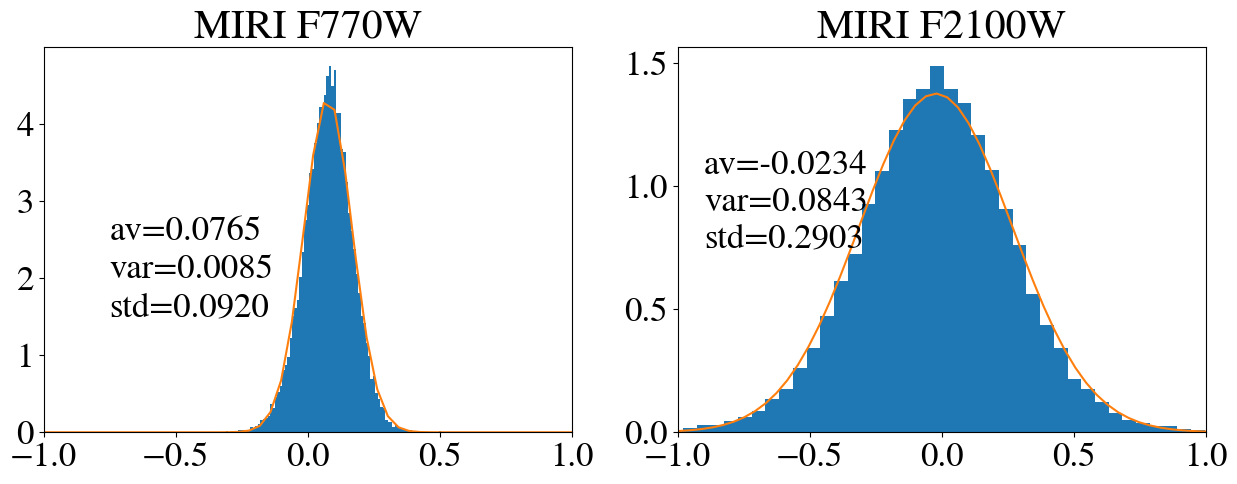

In [12]:
### compute best fit and plot stats ### 

b770 = cutout770.ravel()
b770 = np.where(b770==0, np.nan, b770)

b2100 = cutout2100.ravel()
b2100 = np.where(b2100==0, np.nan, b2100)

# Empirical average and variance are computed
a770 = np.nanmean(b770)
v770 = np.nanvar(b770)
std770_1 = np.nanstd(b770)
print(std770_1, a770)
# From that, we know the shape of the fitted Gaussian.
pdf_x = np.linspace(-2,2,100)
pdf_y_770 = 1.0/np.sqrt(2*np.pi*v770)*np.exp(-0.5*(pdf_x-a770)**2/v770)

a2100 = np.nanmean(b2100)
v2100 = np.nanvar(b2100)
std2100_1 = np.nanstd(b2100)
print(std2100_1, a2100)
pdf_y_2100 = 1.0/np.sqrt(2*np.pi*v2100)*np.exp(-0.5*(pdf_x-a2100)**2/v2100)


fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (15,5))
ax1.hist(b770, bins=100, density=True)
ax1.plot(pdf_x, pdf_y_770)
ax1.set_xlim(-1, 1)
ax1.text(-0.75, 2.5, 'av={:.4f}'.format(a770))
ax1.text(-0.75, 2, 'var={:.4f}'.format(v770))
ax1.text(-0.75, 1.5, 'std={:.4f}'.format(std770_1))
ax1.set_title('MIRI F770W')

ax2.hist(b2100, bins=100, density=True)
ax2.plot(pdf_x, pdf_y_2100)
ax2.set_xlim(-1, 1)
ax2.text(-0.9, 1.05, 'av={:.4f}'.format(a2100))
ax2.text(-0.9, 0.9, 'var={:.4f}'.format(v2100))
ax2.text(-0.9, 0.75, 'std={:.4f}'.format(std2100_1))
ax2.set_xlim(-1, 1)
ax2.set_title('MIRI F2100W')
plt.savefig(path2+gal+"_stats_miri.png")
plt.show()

Set DATE-AVG to '2024-02-08T12:47:13.280' from MJD-AVG.
Set DATE-END to '2024-02-08T12:51:14.866' from MJD-END'. [astropy.wcs.wcs]
Set OBSGEO-B to    16.057640 from OBSGEO-[XYZ].
Set OBSGEO-H to 1557860969.839 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]
Set DATE-AVG to '2024-02-08T13:01:42.973' from MJD-AVG.
Set DATE-END to '2024-02-08T13:07:10.449' from MJD-END'. [astropy.wcs.wcs]
Set OBSGEO-B to    16.060596 from OBSGEO-[XYZ].
Set OBSGEO-H to 1557790715.966 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]


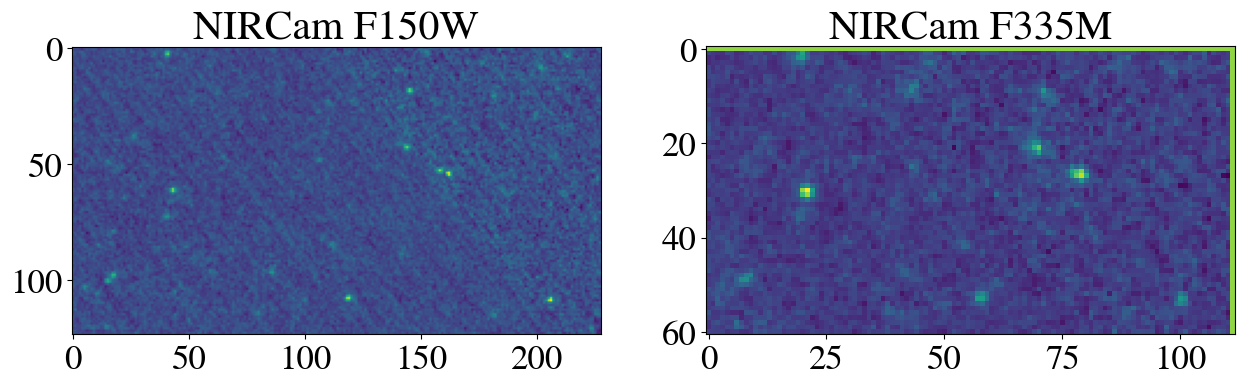

In [49]:
### do the same for NIRCam data ###

gal = 'ngc2283'
path1 = 'empty_regions/'
path = 'JWST_Cycle2/'
path2 = 'figures/' 
#c = 'atGauss0p85_'
with fits.open(path+gal+'_nircam_lv3_f150w_i2d_anchor.fits') as hdul:
    f150 = hdul['SCI'].data
    h150 = hdul['SCI'].header
wcs150 = WCS(h150).celestial
    
with fits.open(path+gal+'_nircam_lv3_f335m_i2d_anchor.fits') as hdul:
    f335 = hdul['SCI'].data
    h335 = hdul['SCI'].header
wcs335 = WCS(h335).celestial

from regions import RectangleSkyRegion, RectanglePixelRegion, Regions
back_reg = Regions.read(path1+gal+'_nircam.reg', format='ds9')
#print(back_reg)
pix_reg = back_reg[0].to_pixel(wcs150)
#print(pix_reg)
mask = pix_reg.to_mask() 
cutout150 = mask.cutout(f150)
pix_reg = back_reg[0].to_pixel(wcs335)
mask = pix_reg.to_mask()
cutout335 = mask.multiply(f335)
#print(cutout335)
fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (15,10))
ax1.imshow(cutout150.data)#, vmin=-1, vmax=1)
ax1.set_title('NIRCam F150W')
ax2.imshow(cutout335.data)#, vmin=-1, vmax=1)
ax2.set_title('NIRCam F335M')
plt.savefig(path2+gal+"_region_nircam.png")
plt.show()

In [47]:
#plt.imshow(f335, vmin=0, vmax=20)

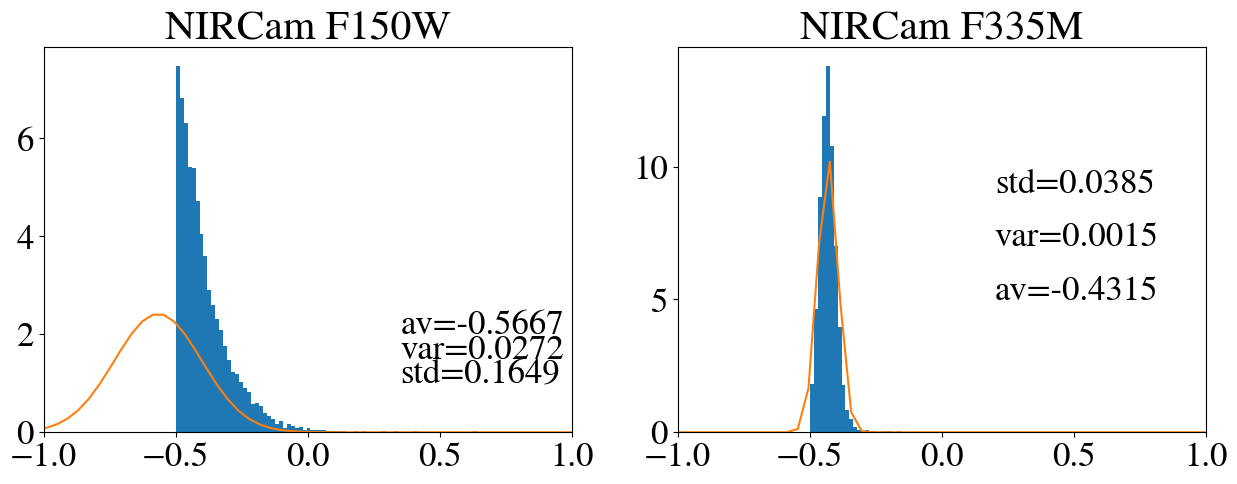

In [50]:
### do the same of NIRCam data ###


b150 = cutout150.ravel()
b150 = np.where(b150==0, np.nan, b150)

b335 = cutout335.ravel()
b335 = np.where(b335==0, np.nan, b335)

# Empirical average and variance are computed
a150 = np.nanmean(b150)
v150 = np.nanvar(b150)
std150_1 = np.nanstd(b150)
#print(std150_1, a150)
# From that, we know the shape of the fitted Gaussian.
pdf_x = np.linspace(-2,2,100)
pdf_y_150 = 1.0/np.sqrt(2*np.pi*v150)*np.exp(-0.5*(pdf_x-a150)**2/v150)

a335 = np.nanmean(b335)
v335 = np.nanvar(b335)
std335_1 = np.nanstd(b335)
#print(std335_1, a335)
pdf_y_335 = 1.0/np.sqrt(2*np.pi*v335)*np.exp(-0.5*(pdf_x-a335)**2/v335)


fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (15,5))
ax1.hist(b150, bins=100, density=True, range = [-0.5,1])
ax1.plot(pdf_x, pdf_y_150)
ax1.set_xlim(-1, 1)
ax1.text(0.35, 2.0,'av={:.4f}'.format(a150))
ax1.text(0.35, 1.5, 'var={:.4f}'.format(v150))
ax1.text(0.35, 1.0, 'std={:.4f}'.format(std150_1))
ax1.set_title('NIRCam F150W')

ax2.hist(b335, bins=100, density=True, range = [-0.5,1])
ax2.plot(pdf_x, pdf_y_335)
ax2.set_xlim(-1, 1)
ax2.text(0.2, 5, 'av={:.4f}'.format(a335))
ax2.text(0.2, 7, 'var={:.4f}'.format(v335))
ax2.text(0.2, 9, 'std={:.4f}'.format(std335_1))
#ax2.set_xlim(-0.1, 0.1)
ax2.set_title('NIRCam F335M')
plt.savefig(path2+gal+"_stats_nircam.png")
plt.show()